# Exploratory Data Analysis

In [68]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import warnings

In [69]:
import os
os.chdir('/home/user')

In [70]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,company_txt,same_state,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,KnowBe4,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,PNNL,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,Affinity Solutions,1,22,1,0,0,0,1


In [71]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'same_state',
       'age', 'python', 'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [72]:
df['Job Title'].value_counts()                                                                                     # We want to simplify this further

Data Scientist                                                 131
Data Engineer                                                   53
Senior Data Scientist                                           34
Data Analyst                                                    15
Senior Data Engineer                                            14
                                                              ... 
Manager, Safety Scientist, Medical Safety & Risk Management      1
Senior Quantitative Analyst                                      1
Senior Data Analyst/Scientist                                    1
Staff Scientist                                                  1
Senior Data Scientist - Algorithms                               1
Name: Job Title, Length: 264, dtype: int64

In [73]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    


In [74]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)
df['job_simplified'].value_counts()


data scientist      279
na                  187
data engineer       119
data analyst         99
machine learning     22
manager              22
director             14
Name: job_simplified, dtype: int64

In [75]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts() 

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [76]:
count=0
for i in df['Job Title']:
    if 'data scientist' in i.lower():
        count=count+1
print(count)
    

279


In [77]:
# Fix State Los Angeles
df['job_state']=df['job_state'].apply(lambda x: x.strip() if x.strip().lower()!='los angeles' else 'CA')
df['job_state'].value_counts()
#df.drop('job_state',inplace=True,axis=1)

KeyError: 'job_state'

In [78]:
# Job Description Length
df['desc_len']=df['Job Description'].apply(lambda x:len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [79]:
# Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [46]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [47]:
# Hourly wage to annual wage-so to convert the annual into hourly we multiply it with 2000(approx)
df['min_salary']=df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1 )
# If the salary is on hourly basis then we get it to annual salary by multiplying it by 2,if its in the normal form then remain as it is

In [48]:
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1 ) # Similarly the max_salary

In [49]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [50]:
df.describe()  # gives only numerical variables,if we give df.describe(include=all) then it gives categorical variables as well

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r_studio,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.726415,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.661601,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [51]:
# Univariate Analysis involves only one variable(histogram,boxplot,barplot etc) but bivariate analysis included 2 variables(like a scatter plot)

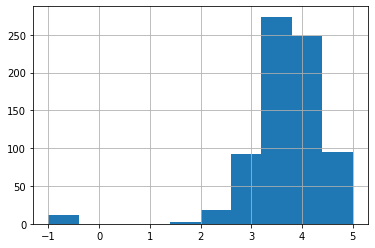

In [52]:
df.Rating.hist()
#df.Rating.plot(kind='hist')-other method to create a histogram but it doesn't show the grids

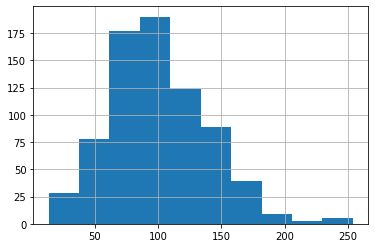

In [53]:
df['avg_salary'].hist() # This plot actually follows normal distribution

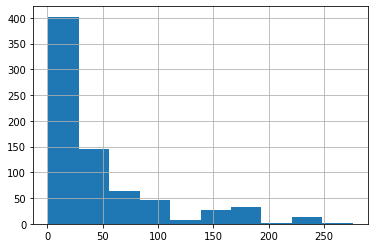

In [54]:
df.age.hist() # Age is not at all normally distributed so if we want to use it in regression or something then we have to normalize the data

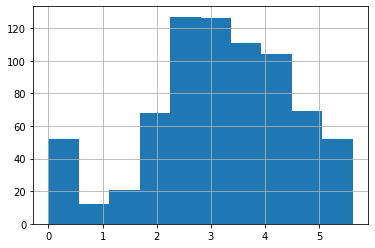

In [55]:
log_data = np.log(df.age)
log_data.hist()

In [56]:
from scipy.stats import lognorm
rv = lognorm(df.age)
rv


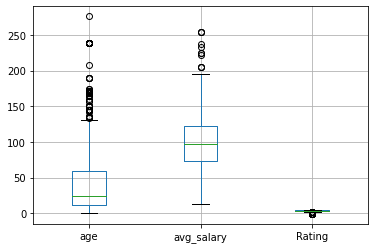

In [57]:
df.boxplot(column = ['age','avg_salary','Rating']) # If we give descripion length here then the boxplots will not be normalized-description length is somewhere near 10,000 but age is like 40-50 years so we have to normalize it
# We need to apply feature scaling to get all the values to the same scale(values range between 0 to 1)
# But in this case we can find a good amount of outliers 


In [58]:
Q1=df['avg_salary'].describe()[4]
Q3=df['avg_salary'].describe()[6]
IQR=Q3-Q1
df['avg1']=df[(df['avg_salary'] < Q1-1.5*IQR ) | (df['avg_salary'] > Q3+1.5*IQR)]['avg_salary']

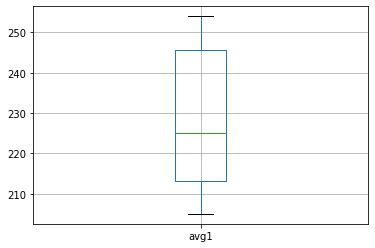

In [59]:
df.boxplot(column='avg1')

In [60]:
df.drop('avg1',axis=1,inplace=True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'desc_len', 'num_comp'],
      dtype='object')

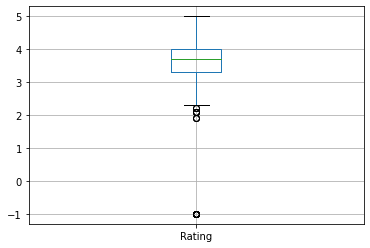

In [61]:
df.boxplot(column='Rating') # There are few values with -1 also

In [62]:
df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

,age,avg_salary,Rating,desc_len,num_comp
age,1.000000,0.019817,0.018630,0.163344,0.125086
avg_salary,0.019817,1.000000,0.013492,0.078808,0.093813
Rating,0.018630,0.013492,1.000000,-0.012281,0.027190
desc_len,0.163344,0.078808,-0.012281,1.000000,0.104620
num_comp,0.125086,0.093813,0.027190,0.104620,1.000000


In [63]:
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(df[['age','avg_salary1','Ratings','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [65]:
#sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']],center=0)

In [66]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'desc_len', 'num_comp'],
      dtype='object')

In [67]:
# Now we deal with the categorical variables

In [33]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt','spark','aws', 'excel', 'job_simplified','seniority']]

graph for Location: total = 200


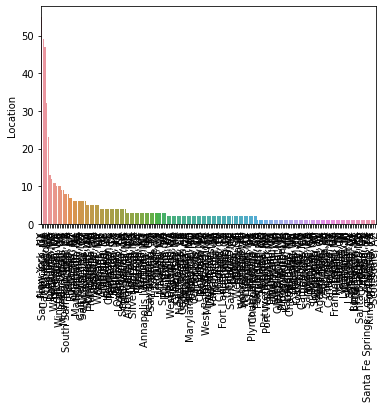

graph for Headquarters: total = 198


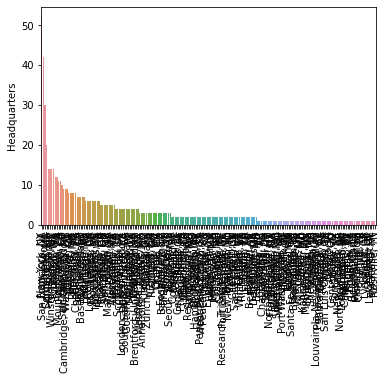

graph for Size: total = 9


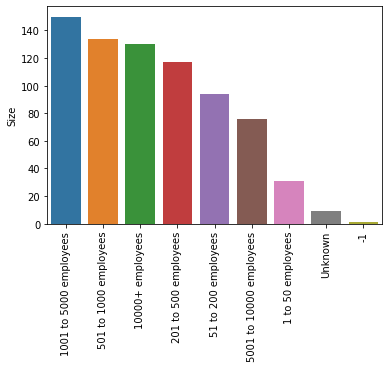

graph for Type of ownership: total = 11


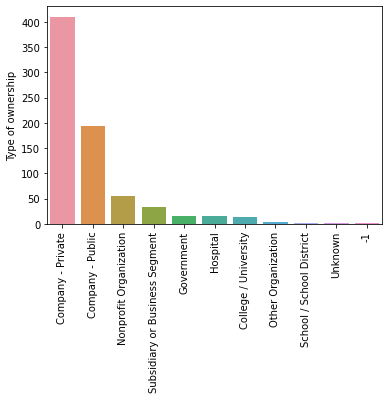

graph for Industry: total = 60


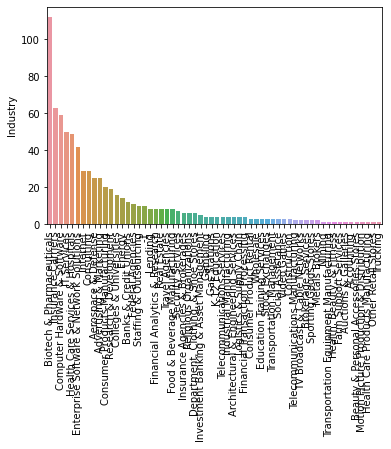

graph for Sector: total = 25


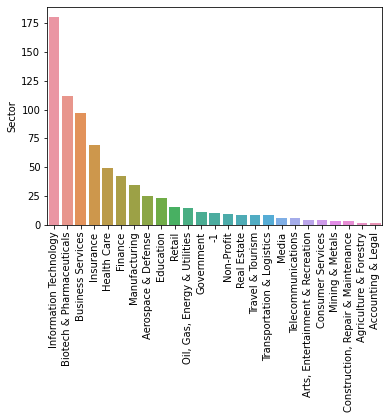

graph for Revenue: total = 14


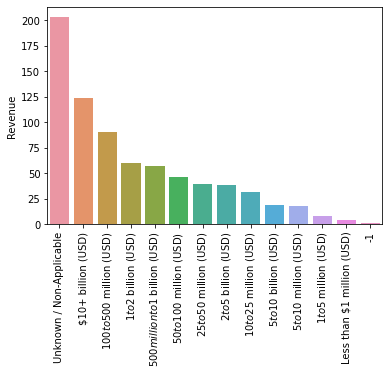

graph for company_txt: total = 343


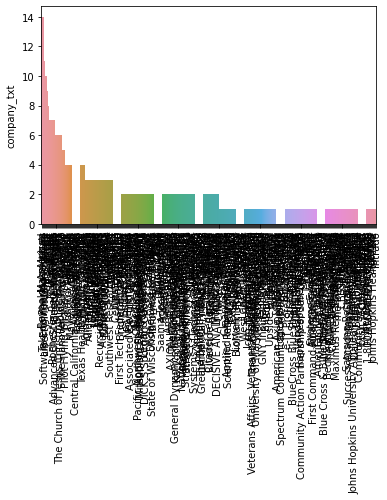

graph for spark: total = 2


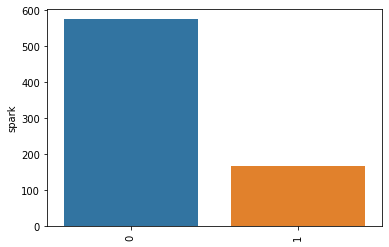

graph for aws: total = 2


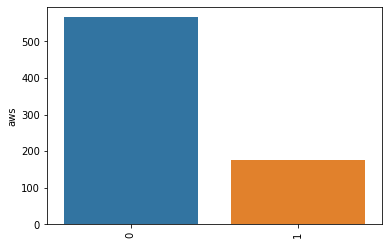

graph for excel: total = 2


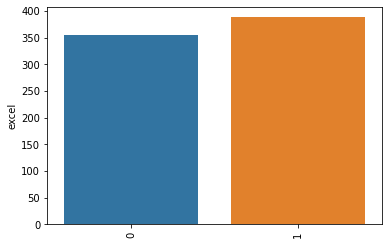

graph for job_simplified: total = 7


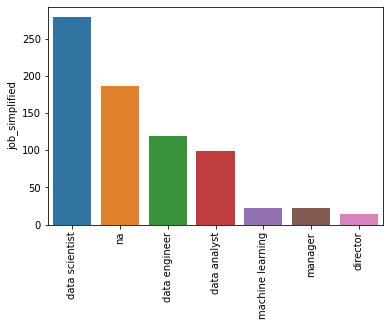

graph for seniority: total = 3


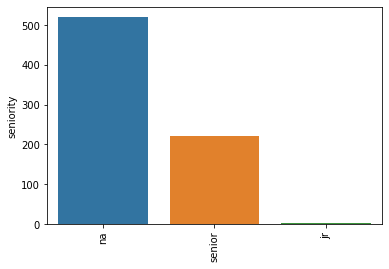

In [34]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    cat = sns.barplot(x = cat_num.index, y = cat_num)
    cat.set_xticklabels(cat.get_xticklabels(), rotation = 90)
    plt.show()

In [35]:
# So we can see from the locations that San Francisco is the most popular city for the job openings
# Most of the companies are between 1000-5000 range which isn't actually very big because there are 5000-10000 employees as well
# When it comes to the type of ownership the private companies are the most common in these positions
# So obviously there is a huge demand in the IT sector but there is a very good scope in Biotech and Pharmaceutical fields as well which is actually shocking

graph for Location: total = 20


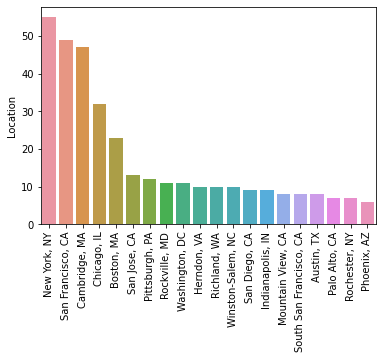

graph for Headquarters: total = 20


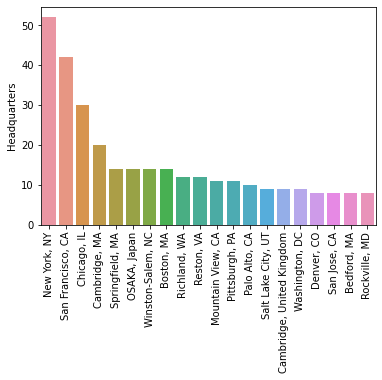

graph for company_txt: total = 20


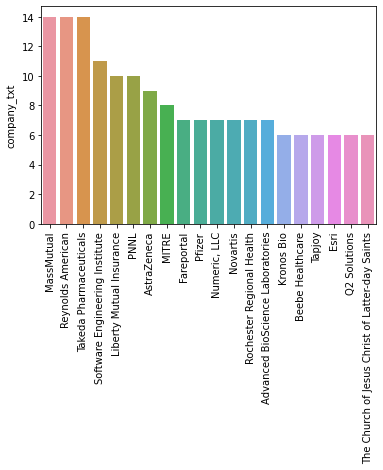

In [36]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20] #taking only the first 20 categories
    print("graph for %s: total = %d" % (i,len(cat_num)))
    cat=sns.barplot(x = cat_num.index, y = cat_num)
    cat.set_xticklabels(cat.get_xticklabels(), rotation = 90)
    plt.show()
    

In [37]:
# New York has the most number of job openings-then comes San Francisco,,Cambridge,Chicago
# When it comes to headquarters its New York and then San Francisco which isn't surprising because these are very big cities with many job opportunites.
# While coming to the company there are no super big companies like Microsoft,Google which is quite surprising

In [38]:
pd.pivot_table(df,index='job_simplified',values='avg_salary')
# This gives us the average salary of different data science positions/roles
# Its actually interesting to know that data scientists and data engineers earn more than managers and machine learning engineers earn more than data scientists

,avg_salary
job_simplified,
data analyst,64.621212
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,85.203209


In [39]:
pd.pivot_table(df,index = ['job_simplified','seniority'], values = 'avg_salary')
# This gives us the average salary of junior,senior data scientists,data engineers etc.

avg_salary
job_simplified   seniority            
data analyst     jr          56.500000
                 na          60.812500
                 senior      75.480769
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.980620
                 senior     110.163793

In [54]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [57]:
pd.pivot_table(df,index = ['job_state'], values = 'avg_salary').sort_values('avg_salary',ascending = False)
# So we can see that the average salary is higher in California,Illinois,DC,Massachussets but average salary for New York is lesser than all these states which is quite surprising
# So maybe there are more number of data analysts and data engineers than data scientists,machine learning engineers or else maybe the cost of living in New York is very high
# So lets find out if that is the case

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [56]:
pd.pivot_table(df, index = ['job_state','job_simplified'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified            
WI        na               54.000000
          data scientist  113.500000
          data analyst     58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        data analyst     55.000000
          na              124.500000
AL        na               51.833333
          data engineer    65.000000
          data analyst     60.750000

[114 rows x 1 columns]

In [43]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [63]:
pd.pivot_table(df, index = ['job_state','job_simplified'], 
               values = 'avg_salary',aggfunc='count').sort_values('job_state', ascending = False) 

avg_salary
job_state job_simplified            
WI        na                       4
          data scientist           3
          data analyst             3
WA        na                       1
          data scientist          17
...                              ...
AZ        data analyst             1
          na                       2
AL        na                       3
          data engineer            1
          data analyst             4

[114 rows x 1 columns]

In [58]:
# The number of data scientists are actually more in New York,but when it comes to Illinois,they are hiring more number of directors so obviously the salary will be very high.
# So that's actually bringing down the average salary of New York.

In [59]:
pd.pivot_table(df[df['job_simplified']=='data scientist'],index='job_state',values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [56]:
# We compare only the data scientists salary here so here Washington DC is leading here in the average salary and the average for New York is not very high which is a very pretty interesting insight.

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [67]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python',
                 'r_studio', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [68]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [60]:
# So coming to Ratings unrated are more and then the perfect 5 obviously have more salary.
# Coming to the industries retail stores are high and even motion picture production pays a lot.Coming to the Sector media is at the top which is interesting
# Hourly workers are obviously paid a lot worse. When the description contains Python its higher which is pretty obvious as Python is the most trending programming language right now.
# Spark,AWS are also higher and are important skills for data scientists but for Excel its lower becuase most of the data scientists do not use Excel.
# We have seen that most of the job postings were private but it looks like in general public companies are paying the most,the Universitites are also paying a reasonable amount

In [61]:
pd.pivot_table(df_pivots,index='Revenue',columns='python',values='avg_salary',aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [62]:
# Here we can see like who's interested in Python and we see that most of the data scientists are interested in Python.

In [63]:
# Now we make a word cloud of job descriptions to see which words are used more popularly. 

In [69]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

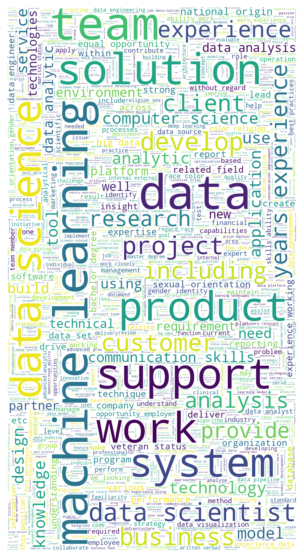

In [78]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# So the most important terms involved are Data Science and Machine Learning
# The other important words in the wordcloud include team,support,work,system etc.